**Perfoming exploratory data analysis to better understand the shape & structure of the data, investigate initial
questions, and develop preliminary insights & hypotheses**


**Importing all relevant python libraries for data cleaning and exploratory visual analysis**


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


**Importing the Data Set with parameters influencing trends in happiness**

In [ ]:
file_path="/content/happiness levels.csv"
alpha_dreamers_df=pd.read_csv(file_path)



**Overview of the shape & stucture of
your dataset**


In [ ]:
#general information about Data set
print(alpha_dreamers_df.head())



In [ ]:
#checking for missing values

print(alpha_dreamers_df.isnull().sum())

In [ ]:
#check for duplicates
print(alpha_dreamers_df.duplicated().sum())

0


In [ ]:
# Handle missing values
alpha_dreamers_df.fillna(alpha_dreamers_df.mean(), inplace=True)

<ipython-input-10-3cd7cd77f0ad>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  alpha_dreamers_df.fillna(alpha_dreamers_df.mean(), inplace=True)


In [ ]:
alpha_dreamers_df.fillna(alpha_dreamers_df.mean(numeric_only=True), inplace=True)


In [ ]:
print(alpha_dreamers_df.columns)


In [ ]:
#dropping some columns
alpha_dreamers_df.drop(['dystopia_residual', 'generosity'], axis=1)


**Investigating initial questions, as well as any
new questions that arise during exploration by creating
a visualization that might provide a useful answer**

#1. What is the distribution of GDP per Capita like across continents

<function matplotlib.pyplot.show(close=None, block=None)>

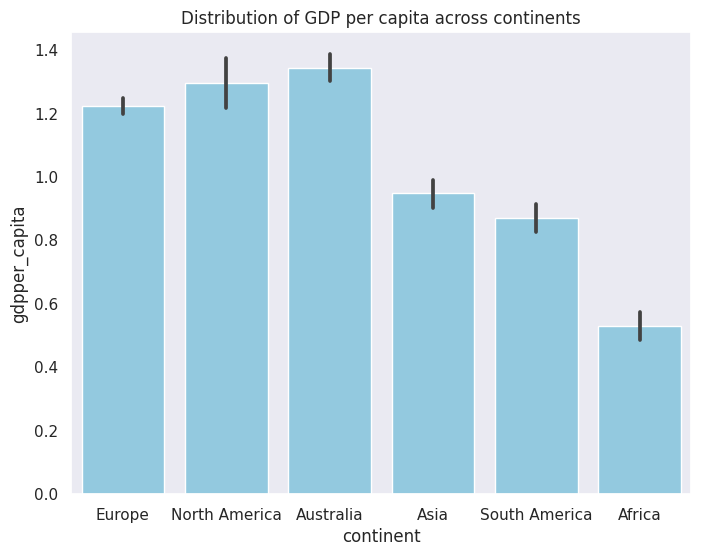

In [ ]:

sns.set(style="dark")

#  Bar Chart - Distribution of GDP per Capita across continents
plt.figure(figsize=(8, 6))
sns.barplot(x='continent',y='gdp_per_capita', data=alpha_dreamers_df, color='skyblue')
plt.title('Distribution of GDP per capita across continents')
plt.xlabel('continent')
plt.ylabel('gdpper_capita')
plt.show

In [ ]:
# Filter data for African countries
african_countries_df = alpha_dreamers_df[alpha_dreamers_df['continent'] == 'Africa']

# Calculate the mean GDP per capita for African countries
mean_gdp_per_capita_africa = african_countries_df['gdp_per_capita'].mean()

# Display the mean GDP per capita for African countries
print(f"The mean GDP per capita in African countries is: {mean_gdp_per_capita_africa:.2f}")

The mean GDP per capita in African countries is: 0.53


In [ ]:
# Calculate the mean GDP per capita for each continent
mean_gdp_per_capita_by_continent = alpha_dreamers_df.groupby('continent')['gdp_per_capita'].mean()

# Display the mean GDP per capita for each continent
print(mean_gdp_per_capita_by_continent)

continent
Africa           0.529133
Asia             0.948058
Australia        1.342890
Europe           1.222620
North America    1.295400
South America    0.871571
Name: gdp_per_capita, dtype: float64


#2. Which continent is most happiest?

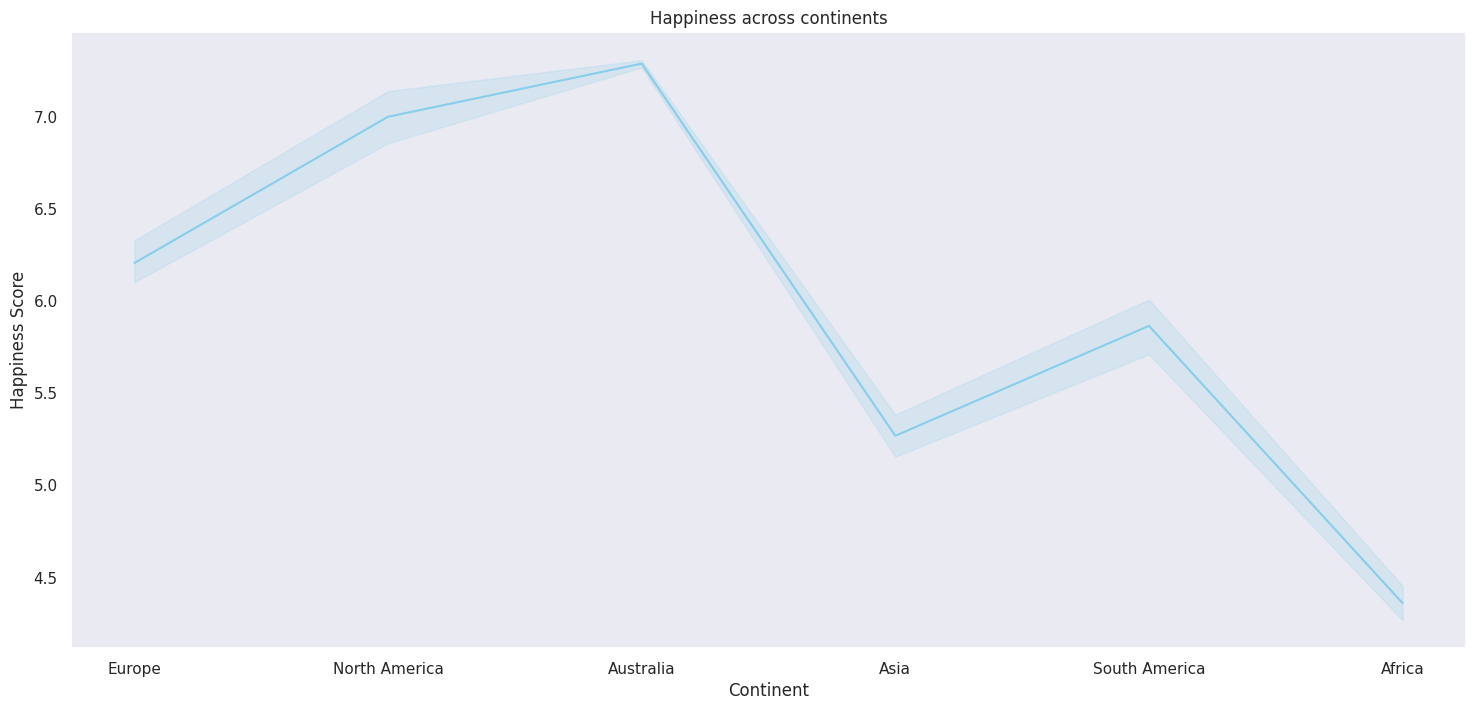

In [ ]:
#  lineplot - Happiness Score Distribution by continents
plt.figure(figsize=(18, 8))
sns.lineplot(x='continent', y='happiness_score', data=alpha_dreamers_df, color='skyblue')
plt.title('Happiness across continents')
plt.xlabel('Continent')
plt.ylabel('Happiness Score')
plt.show()

#3. What are the general trends in happiness across the years?

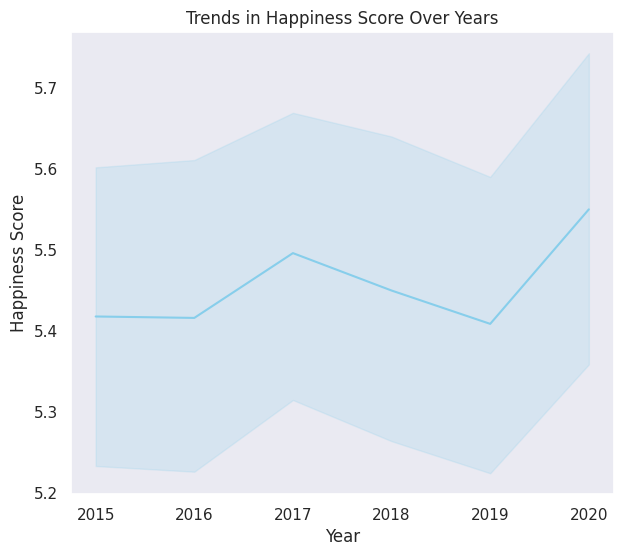

In [ ]:


# Line Chart - Trends in Happiness Score Over Years
plt.figure(figsize=(7, 6))
sns.lineplot(x='year', y='happiness_score', data=alpha_dreamers_df,color='skyblue' )
plt.title('Trends in Happiness Score Over Years')
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.show()

In [ ]:
# Calculate average happiness score across continents over years
avg_happiness_by_continent = alpha_dreamers_df.groupby(['continent', 'year'])['happiness_score'].mean().reset_index()

# Display the resulting DataFrame
print(avg_happiness_by_continent)

In [ ]:
# Calculate the average happiness score across all data
average_happiness_score = alpha_dreamers_df['happiness_score'].mean()

# Display the average happiness score
print(f"The average happiness score is: {average_happiness_score:.2f}")

The average happiness score is: 5.46


#4. How is happiness score correlated to the other parameters?

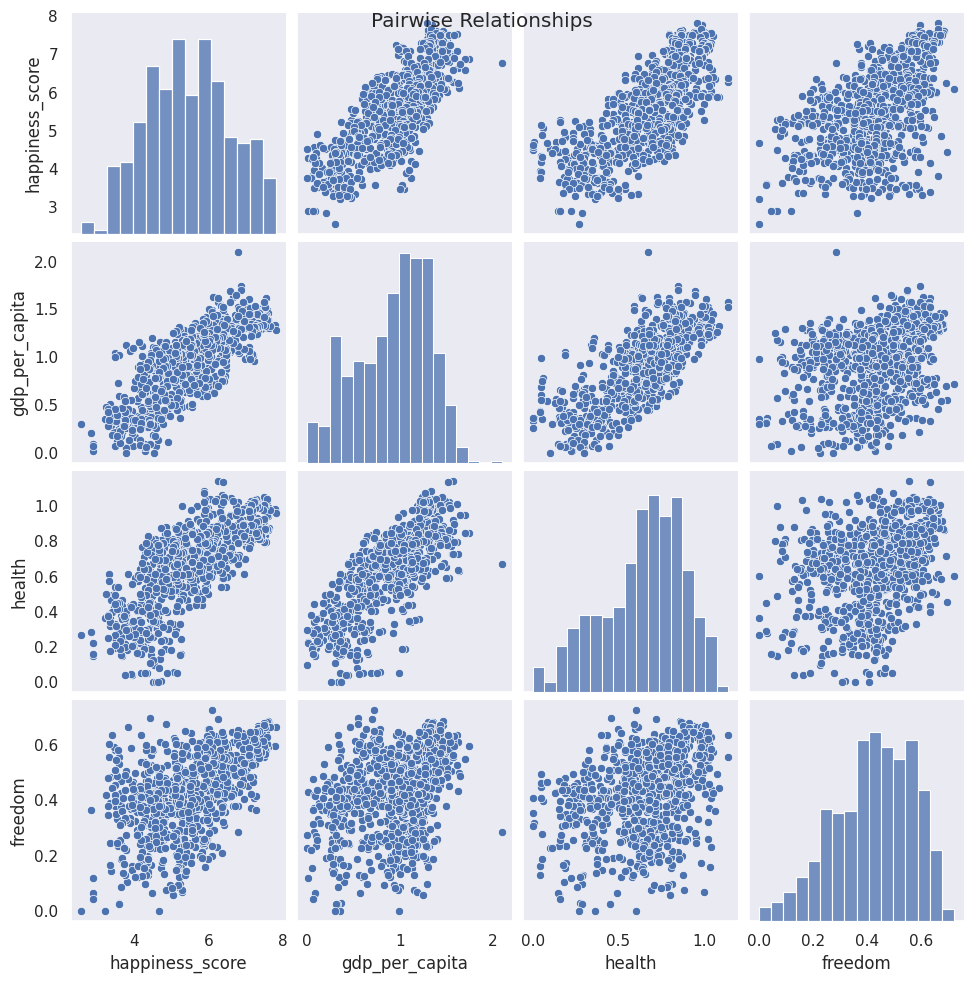

In [ ]:
#  Pair Plot - Pairwise Relationships
sns.pairplot(alpha_dreamers_df[['happiness_score', 'gdp_per_capita',  'health', 'freedom']])
plt.suptitle('Pairwise Relationships')
plt.show()

#5. Investigating happiness trends in Africa

<ipython-input-7-7a1bfef0d8c7>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_scores = africa_df.groupby('year').mean().reset_index()


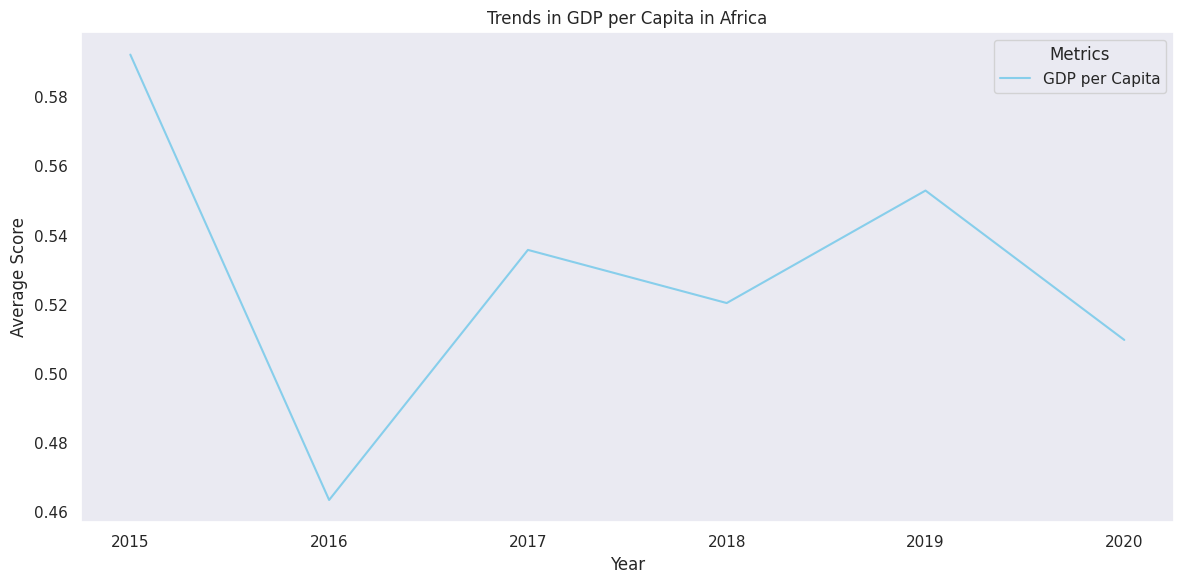

In [ ]:



# Filter the dataset for countries in Africa
africa_df = alpha_dreamers_df[alpha_dreamers_df['continent'] == 'Africa']

# Calculate the average scores for each year
avg_scores = africa_df.groupby('year').mean().reset_index()


plt.figure(figsize=(12, 6))

# GDP per capita
sns.lineplot(x='year', y='gdp_per_capita', data=avg_scores, label='GDP per Capita', color='skyblue')

# Set title and labels
plt.title('Trends in GDP per Capita in Africa')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.legend(title='Metrics')

# Display the plot
plt.tight_layout()
plt.show()


#6. What have been the general trends in happiness in Africa over the years?

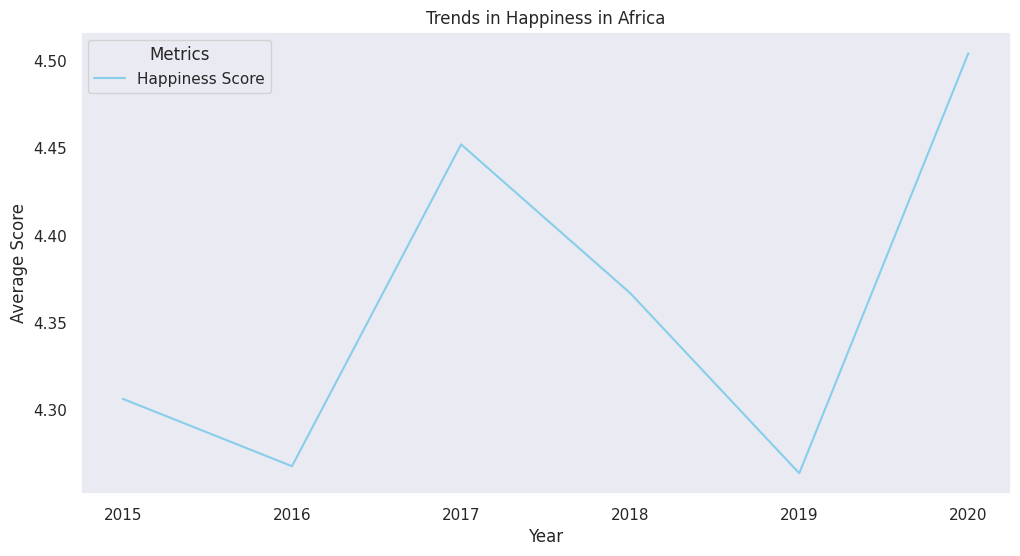

In [ ]:
plt.figure(figsize=(12, 6))

# Happiness trends in Africa
sns.lineplot(x='year', y='happiness_score', data=avg_scores, label='Happiness Score', color='skyblue')
plt.title('Trends in Happiness in Africa')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.legend(title='Metrics')

#7.What are the average health conditions like in Africa?

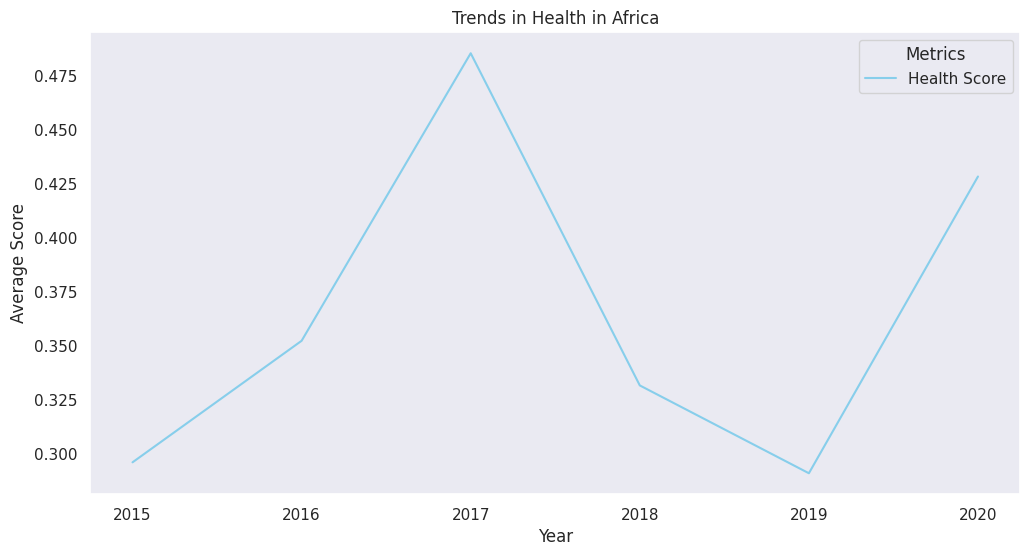

In [ ]:
plt.figure(figsize=(12, 6))

# Health
sns.lineplot(x='year', y='health', data=avg_scores, label='Health Score',color='skyblue')
# Set title and labels
plt.title('Trends in Health in Africa')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.legend(title='Metrics')

#8. Investigating happiness trends in Southern Africa by assesing health and GDP per Capita

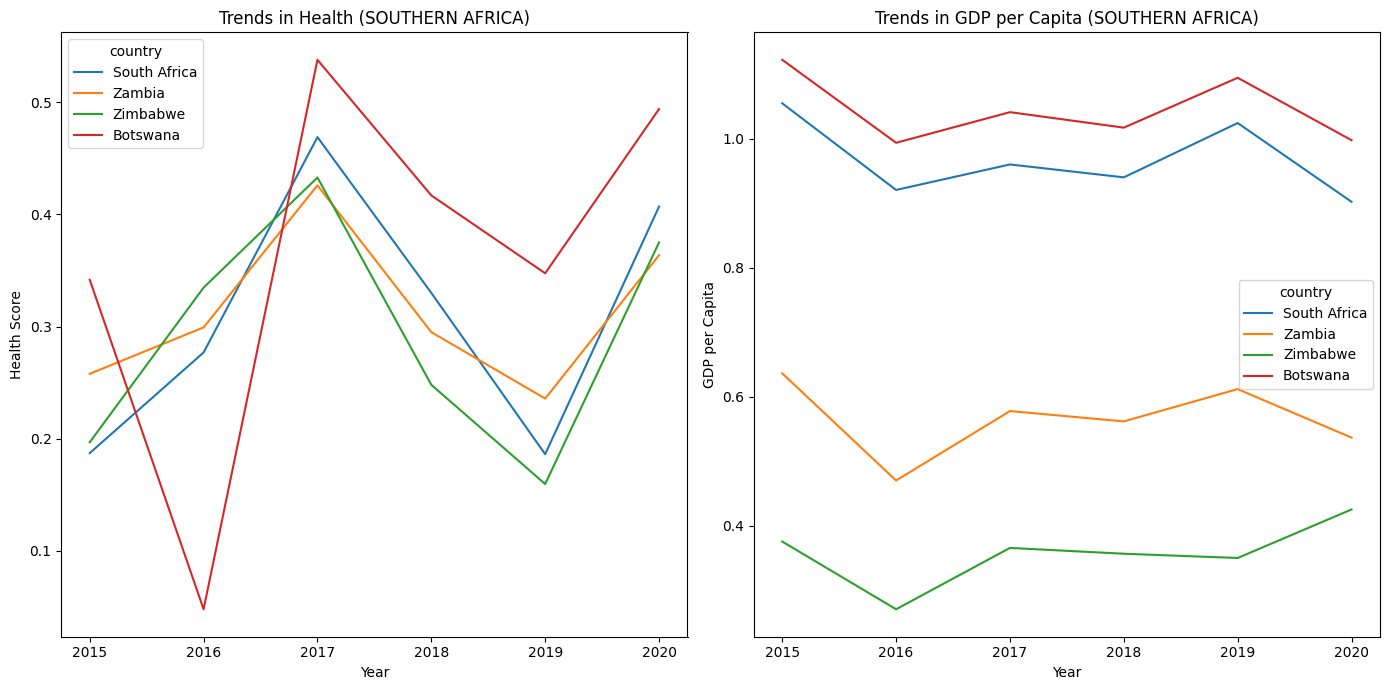

In [ ]:


# List of Southern Africa countries
sadc_countries = [ 'Botswana','Namibia', 'South Africa', 'Zambia', 'Zimbabwe']

# Filter the dataset for Southern Africa countries
sadc_df = alpha_dreamers_df[alpha_dreamers_df['country'].isin(sadc_countries)]

# Plotting the trends in health and GDP per capita
plt.figure(figsize=(14, 7))

# Health
plt.subplot(1, 2, 1)
sns.lineplot(x='year', y='health', hue='country', data=sadc_df)
plt.title('Trends in Health (SOUTHERN AFRICA)')
plt.xlabel('Year')
plt.ylabel('Health Score')
# GDP per capita
plt.subplot(1, 2, 2)
sns.lineplot(x='year', y='gdp_per_capita', hue='country', data=sadc_df)
plt.title('Trends in GDP per Capita (SOUTHERN AFRICA)')
plt.xlabel('Year')
plt.ylabel('GDP per Capita')


plt.tight_layout()
plt.show()




9. Investigating health and GDP per Capita trends in Botswana and South Africa specifically

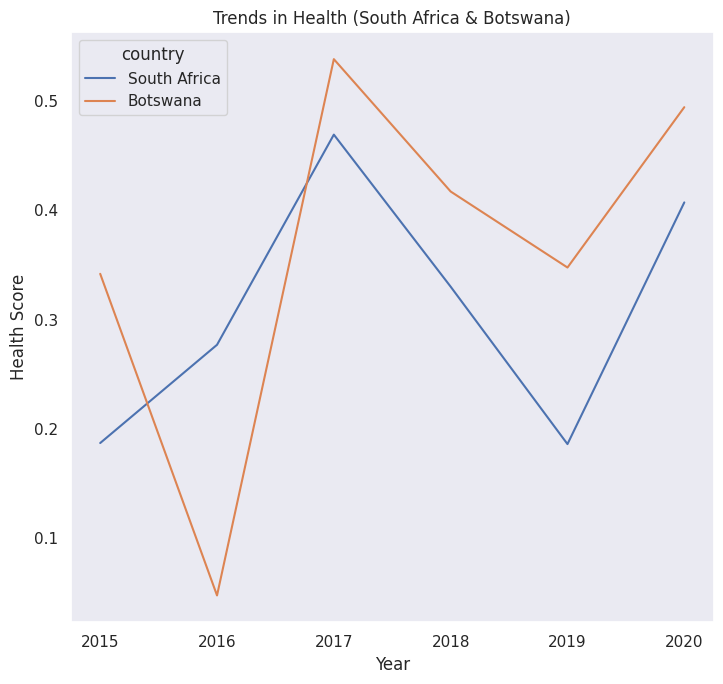

In [ ]:



# South Africa and Botswana
countries_of_interest = ['South Africa', 'Botswana']

# Filter for South Africa and Botswana
sa_botswana_df = alpha_dreamers_df[alpha_dreamers_df['country'].isin(countries_of_interest)]

# Plotting the trends in health and GDP per capita
plt.figure(figsize=(14, 7))

# Health
plt.subplot(1, 2, 1)
sns.lineplot(x='year', y='health', hue='country', data=sa_botswana_df)
plt.title('Trends in Health (South Africa & Botswana)')
plt.xlabel('Year')
plt.ylabel('Health Score')


plt.tight_layout()
plt.show()


Text(0, 0.5, 'GDP per Capita')

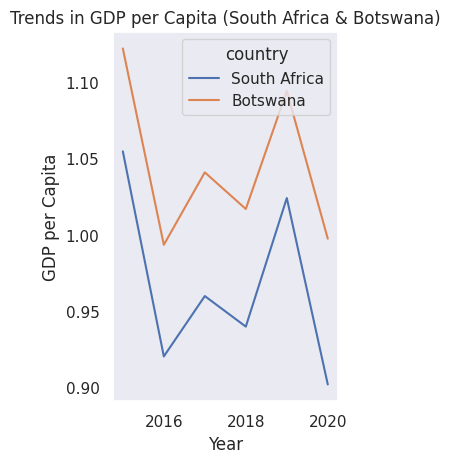

In [ ]:
# GDP per capita
plt.subplot(1, 2, 1)
sns.lineplot(x='year', y='gdp_per_capita', hue='country', data=sa_botswana_df)
plt.title('Trends in GDP per Capita (South Africa & Botswana)')
plt.xlabel('Year')
plt.ylabel('GDP per Capita')
